In [2]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict
%matplotlib inline

In [2]:
# load sentiment scores in "data/sbs_bic_20-06-29"

In [27]:
import json
with open('db.json') as reader:
    data= json.load(reader)

In [28]:
with open('db_yiyi.json') as reader:
    data_yiyi = json.load(reader)

In [29]:
annotations_yiyi = data_yiyi['annotations']

In [30]:
annotations_yiyi[0]

{'id': 'lZqrFrJub',
 'date': '2020-06-30T10:59:09.303Z',
 'filename': 'renovation_room_147',
 'fileId': '252',
 'username': 'Edita',
 'annotation': [{'id': 0, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 1, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 2, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 3, 'yes_sentiment': True},
  {'id': 4, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 5, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 6, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 7, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 8, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 9, 'yes_aspect': False, 'yes_sentiment': True}],
 'cptAnswer': {}}

In [31]:
yiyi_annotations=[]
for i in annotations_yiyi:
    if i['username']=='yiyi':
        yiyi_annotations.append(i)
    

In [32]:
len(yiyi_annotations)

207

In [33]:
annotations=data['annotations']

In [34]:
len(annotations)

859

In [35]:
merged_annotations= annotations+yiyi_annotations

In [36]:
len(merged_annotations)

1066

In [37]:
reviews= data['reviews']

In [38]:
with open('data_processed/annotations.json','w') as writer:
    json.dump(merged_annotations, writer)

In [39]:
with open('data_processed/reviews.json', 'w') as writer:
    json.dump(reviews, writer)

In [69]:
len(reviews)

420

In [70]:
for i in merged_annotations:
    if i['fileId']=='84':
        print(i)

{'id': 'bZ-w_D4qh', 'date': '2020-07-08T14:18:05.561Z', 'filename': 'room_368', 'fileId': '84', 'username': 'Oana', 'annotation': [{'id': 0, 'yes_aspect': True}, {'id': 1, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 2, 'yes_aspect': True}, {'id': 3, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 4, 'yes_aspect': True, 'yes_sentiment': False}, {'id': 5}, {'id': 6, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 7}, {'id': 8, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 9, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 10, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 11, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 12, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 13, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 14, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 15, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 16, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 17, 'yes_aspect': True, 'yes_sentiment': True}, {'id': 18, 'yes_aspe

In [44]:
cpts_df = pd.read_csv('preprocessed_data/annotated_cpts_df.csv', index_col=0)
cpts_df.head()

,a,b,c,Total,category,hotel_id,fileId,iId
0_0,2,0,1,3,facility,260,0,0
1_0,0,0,2,2,pool,260,1,0
2_0,2,0,1,3,renovation_room,260,2,0
3_0,2,0,1,3,restaurant,260,3,0
3_1,2,0,1,3,restaurant,260,3,1


In [72]:
sents_df = pd.read_csv('preprocessed_data/annotated_sentences_df.csv', index_col=0)
sents_df.head()

,yes-sentiment,yes-aspect,no-sentiment,no-aspect,category,hotel_id,cpt,Total,fileId,iId
0_0,2,2,0,0,facility,260,0,4,0,0
0_2,2,2,0,0,facility,260,0,4,0,2
0_3,2,2,0,0,facility,260,0,4,0,3
0_4,0,2,2,0,facility,260,0,4,0,4
0_5,2,2,0,0,facility,260,0,4,0,5


#  Change points

In [46]:
cpts_df['gold']= cpts_df[['a','b','c']].idxmax(axis=1)

In [47]:
cpts_df.head()

,a,b,c,Total,category,hotel_id,fileId,iId,gold
0_0,2,0,1,3,facility,260,0,0,a
1_0,0,0,2,2,pool,260,1,0,c
2_0,2,0,1,3,renovation_room,260,2,0,a
3_0,2,0,1,3,restaurant,260,3,0,a
3_1,2,0,1,3,restaurant,260,3,1,a


In [48]:
len(cpts_df)

585

In [49]:
gold_labels = cpts_df['gold']

In [50]:
from collections import Counter

In [51]:
Counter(gold_labels)

Counter({'a': 251, 'c': 134, 'b': 200})

### At least one annotator said aspect doesn't align, exclude those sentences.
- then there are only two clusters for reviews in each time period:
    - sentiment aligns with the majority,
    - sentiment doesn't align

**how many times annotators agree with each other**
    - any entry is a two, 14064, 18752, 0.75

## get the sentences no annotators said no.

In [73]:
def gold_aspect(row):
    if row['no-aspect']!=0:
        return False
    else:
        return True

def gold_sentiment(row):
    if row['no-sentiment']!=0:
        return False
    else:
        return True

In [75]:
len(sents_df)

9396

In [76]:
sents_df['gold-aspect']= sents_df.apply(gold_aspect, axis=1)
sents_df['gold-sentiment']= sents_df.apply(gold_sentiment, axis=1)

In [78]:
sents_df_true_sent = sents_df[sents_df['gold-sentiment']==True]

In [79]:
len(sents_df_true_sent), len(sents_df)- len(sents_df_true_sent)

(6043, 3353)

In [80]:
sents_df_true_aspect= sents_df[sents_df['gold-aspect']==True]
len(sents_df_true_aspect), len(sents_df)- len(sents_df_true_aspect)

(6391, 3005)

In [24]:
# hello

In [81]:
json_paths = 'data/sbs_bic_20-06-29'

In [82]:
import rootpath,os,json
root= rootpath.detect()

In [83]:
data_dir = os.path.join(root, json_paths)

In [84]:
data_dir

'/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29'

In [85]:
len(sents_df)

9396

In [86]:
len(list(set(sents_df['hotel_id'])))

140

In [87]:
len(list(set(sents_df['fileId'])))

420

In [88]:
category_hotel_id = list(set(list(zip(sents_df['category'], sents_df['hotel_id']))))

In [89]:
category_hotel_id[:3]

[('room', 401), ('pool', 132), ('room', 163)]

In [90]:
len(category_hotel_id)

420

In [91]:
cat_id_dict = {}
for cat, hotel_id in category_hotel_id:
    name = cat+'_'+str(hotel_id)
    if cat=='renovation_room':
        folder= 'renovation-related/room'
    else:
        folder = cat
    for filepath in glob.glob('/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/'+folder+'/json_file/**.json'):
        filename = os.path.basename(filepath)
        with open(filepath) as reader:
            dat = json.load(reader)
        hotel_idx= int(filename.split('#')[0])
        if hotel_id==hotel_idx:
            cat_id_dict[name]= dat

In [92]:
len(cat_id_dict)

420

In [93]:
cat_id_dict['room_473']

{'sentences': {'0': [['2015-01-04',
    '5d46a7ee-97b0-4762-8c7e-4b3873f2e912',
    "['go', 'throw', 'trash', 'tv', 'notice', 'dirty', 'wire']",
    'When I went to throw away something in trash next to TV I noticed how dirty the wires were',
    -0.4926149249076843],
   ['2015-02-02',
    '31062927-2339-493b-81d3-4762a61a43e5',
    "['complaint', 'free', 'breakfast', 'price', 'pay', 'room', 'sleep', 'number', 'bed', 'assumption', 'bed', 'call', 'morning', 'check', 'early', 'check', 'lady', 'phone', 'nice', 'helpful', 'explain', 'hour', 'drive', 'want', 'check', 'needless', 'leave', 'check', 'lady', 'check', 'counter', 'little', 'crabby', 'family', 'member', 'check', 'assume', 'lady', 'sure', 'have', 'bad', 'day', 'rest', 'staff', 'deal', 'fantastic']",
    'My only complaints were that there was not free breakfast for the price that we paid for the room and that we did not get a sleep number bed I was under the assumption all the beds were and when I called the morning of check in to 

In [94]:
sents_df.head()

,yes-sentiment,yes-aspect,no-sentiment,no-aspect,category,hotel_id,cpt,Total,fileId,iId,gold-aspect,gold-sentiment
0_0,2,2,0,0,facility,260,0,4,0,0,True,True
0_2,2,2,0,0,facility,260,0,4,0,2,True,True
0_3,2,2,0,0,facility,260,0,4,0,3,True,True
0_4,0,2,2,0,facility,260,0,4,0,4,True,False
0_5,2,2,0,0,facility,260,0,4,0,5,True,True


In [95]:
from itertools import chain
def entry_sentiment(row):
    cat = row['category']
    hotel_id = row['hotel_id']
    iId = row['iId']
    name = cat+'_'+str(hotel_id)
    cpt = row['cpt']
    sentence = list(chain.from_iterable(cat_id_dict[name]['sentences'].values()))
    sentiment = sentence[iId][-1]
    return sentiment

In [96]:
def entry_text(row):
    cat = row['category']
    hotel_id = row['hotel_id']
    iId = row['iId']
    name = cat+'_'+str(hotel_id)
    cpt = row['cpt']
    sentence = list(chain.from_iterable(cat_id_dict[name]['sentences'].values()))
    text = sentence[iId][3]
    return text

In [97]:
def entry_date(row):
    cat = row['category']
    hotel_id = row['hotel_id']
    iId = row['iId']
    name = cat+'_'+str(hotel_id)
    cpt = row['cpt']
    sentence = list(chain.from_iterable(cat_id_dict[name]['sentences'].values()))
    date = sentence[iId][0]
    return date

In [98]:
sents_df['text']= sents_df.apply(entry_text, axis=1)
sents_df['date']= sents_df.apply(entry_date, axis=1)
sents_df['sentiment'] = sents_df.apply(entry_sentiment, axis=1)

In [99]:
len(sents_df)

9396

In [100]:
def entry_cpt(row):
    cat = row['category']
    hotel_id = row['hotel_id']
    iId = row['iId']
    name = cat+'_'+str(hotel_id)
    cpt = row['cpt']
    cpts = cat_id_dict[name]['cpt']
    return cpts

In [101]:
def entry_sentiment_mean(row):
    cat = row['category']
    hotel_id = row['hotel_id']
    iId = row['iId']
    name = cat+'_'+str(hotel_id)
    cpt = row['cpt']
    sentiment_mean = cat_id_dict[name]['sentiment_mean'][cpt]
    return sentiment_mean

In [102]:
def entry_dates_periods(row):
    cat = row['category']
    hotel_id = row['hotel_id']
    iId = row['iId']
    name = cat+'_'+str(hotel_id)
    cpt = row['cpt']
    date_period = cat_id_dict[name]['dates_periods'][cpt]
    return date_period

In [103]:
sents_df['cpts'] = sents_df.apply(entry_cpt, axis=1)
sents_df['sentiment_mean'] = sents_df.apply(entry_sentiment_mean, axis=1)
sents_df['date_period']= sents_df.apply(entry_dates_periods, axis=1)

In [46]:
# get the sentiment for each sentence.

In [105]:
sents_df['cpt_id']= sents_df['fileId'].astype(str).str.cat(sents_df['cpt'].astype(str).str, sep='_')

/home/yiyi/anaconda3/envs/cdp/lib/python3.7/site-packages/pandas/core/strings.py:2254: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  others = list(others)  # ensure iterators do not get read twice etc


In [118]:
sents_df.head()

,yes-sentiment,yes-aspect,no-sentiment,no-aspect,category,hotel_id,cpt,Total,fileId,iId,gold-aspect,gold-sentiment,text,date,sentiment,cpts,sentiment_mean,date_period,cpt_id,cpt_label
0_0,2,2,0,0,facility,260,0,4,0,0,True,True,The lobby bar always had a solo performer pian...,2015-02-09,-0.407074,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_2,2,2,0,0,facility,260,0,4,0,2,True,True,We were then escorted to one of the lobby chec...,2015-04-21,-0.405840,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_3,2,2,0,0,facility,260,0,4,0,3,True,True,I went to the gym most mornings but I did the ...,2015-04-30,-0.490811,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_4,0,2,2,0,facility,260,0,4,0,4,True,False,I suggest a room away from the elevators for t...,2015-07-14,-0.439716,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_5,2,2,0,0,facility,260,0,4,0,5,True,True,But Lorena sure did a good job and was so swee...,2015-08-13,-0.105745,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a


In [49]:
# cpts df with gold

In [107]:
cpts_df.head(3)

,a,b,c,Total,category,hotel_id,fileId,iId,gold
0_0,2,0,1,3,facility,260,0,0,a
1_0,0,0,2,2,pool,260,1,0,c
2_0,2,0,1,3,renovation_room,260,2,0,a


In [108]:
cpts_dict = {x:y for x,y in zip(cpts_df.index, cpts_df['gold'])}

In [109]:
def cpt_entry(row):
    cpt_id = row['cpt_id']
    return cpts_dict.get(cpt_id, None)

In [53]:
# get the cpt_label for ssents_df

In [110]:
sents_df['cpt_label']=  sents_df.apply(cpt_entry, axis=1)

In [115]:
sents_df.to_csv('preprocessed_data/sents_df.csv')   ###### get all data which aspects are aligned.

In [113]:
len(sents_df)

9396

In [119]:
gold_aspect_df = sents_df[sents_df['gold-aspect']==True]

In [120]:
gold_aspect_df

,yes-sentiment,yes-aspect,no-sentiment,no-aspect,category,hotel_id,cpt,Total,fileId,iId,gold-aspect,gold-sentiment,text,date,sentiment,cpts,sentiment_mean,date_period,cpt_id,cpt_label
0_0,2,2,0,0,facility,260,0,4,0,0,True,True,The lobby bar always had a solo performer pian...,2015-02-09,-0.407074,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_2,2,2,0,0,facility,260,0,4,0,2,True,True,We were then escorted to one of the lobby chec...,2015-04-21,-0.405840,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_3,2,2,0,0,facility,260,0,4,0,3,True,True,I went to the gym most mornings but I did the ...,2015-04-30,-0.490811,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_4,0,2,2,0,facility,260,0,4,0,4,True,False,I suggest a room away from the elevators for t...,2015-07-14,-0.439716,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_5,2,2,0,0,facility,260,0,4,0,5,True,True,But Lorena sure did a good job and was so swee...,2015-08-13,-0.105745,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419_20,2,2,0,0,room,389,2,4,419,20,True,True,The rooms are nice not extremelyImpresive,2018-07-02,0.384938,"[0, 155, 230, 781]",0.065789,"[2017-05-20, 2020-03-17]",419_2,None
419_21,2,2,0,0,room,389,2,4,419,21,True,True,Very spacious great bedding a huge TV comforta...,2018-08-01,0.499862,"[0, 155, 230, 781]",0.065789,"[2017-05-20, 2020-03-17]",419_2,None
419_22,2,2,0,0,room,389,2,4,419,22,True,True,Quiet comfortable room comfy bed good pillows,2018-10-12,0.499618,"[0, 155, 230, 781]",0.065789,"[2017-05-20, 2020-03-17]",419_2,None
419_24,2,2,0,0,room,389,2,4,419,24,True,True,The bathtub looked luxurious and the separate ...,2019-12-09,0.499170,"[0, 155, 230, 781]",0.065789,"[2017-05-20, 2020-03-17]",419_2,None


In [121]:
# fill NONE cpt_label 'd'
gold_aspect_df['cpt_label'] = gold_aspect_df['cpt_label'].fillna('d')

/home/yiyi/anaconda3/envs/cdp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
time_series_len = {}
for key, group in gold_aspect_df.groupby('cpt_id'):
    time_series_len[key]= (len(group), group['cpt_label'].to_list()[0])

In [125]:
len(time_series_len)

985

In [126]:
def ts_Len(row):
    cpt_id = row['cpt_id']
    return time_series_len[cpt_id][0]

gold_aspect_df['TS_LEN']= gold_aspect_df.apply(ts_Len, axis=1)

/home/yiyi/anaconda3/envs/cdp/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [128]:
len(gold_aspect_df)

6391

In [133]:
# should there be a/b/c in one time series. then record it.
ls_dfs = []
cpts_nr = 0
cpts_dict =defaultdict(dict)
for key, group in gold_aspect_df.groupby('fileId'):
    cpcs = list(set(group['cpt_id'].to_list()))
    cpc_nr = len(cpcs)

    if key not in cpts_dict:
        cpts_dict[key] = {}
    
    for cpt_id, cpt_label in zip(group['cpt'], group['cpt_label']):
        if cpt_id not in cpts_dict[key]:
            cpts_dict[key][cpt_id] = cpt_label
            
    cpts_nr += cpc_nr-1
    if cpc_nr>1:
        ls_dfs.append(group)

In [134]:
cpts_nr, cpts_dict[68]

(570, {1: 'a', 2: 'd'})

In [145]:
valid_cpts = {}
for fileId, cpt_dict in cpts_dict.items():
    if len(cpt_dict)>1:
        if fileId not in valid_cpts:
            valid_cpts[fileId]= {}
        LEN = len(cpt_dict)
        if LEN >1:
            d = dict(list(cpt_dict.items())[:-1])
            for cpt_id, cpt_label in d.items():
                valid_cpts[fileId][cpt_id]= cpt_label
    else:
        print(fileId, cpt_dict)

12 {0: 'd'}
53 {0: 'd'}
77 {1: 'd'}
85 {1: 'd'}
106 {0: 'd'}
112 {0: 'd'}
133 {1: 'd'}
143 {0: 'd'}
163 {0: 'd'}
183 {0: 'd'}
185 {0: 'd'}
192 {1: 'd'}
193 {0: 'd'}
216 {1: 'd'}
240 {1: 'd'}
252 {1: 'd'}
256 {0: 'a'}
260 {0: 'd'}
265 {0: 'd'}
280 {1: 'd'}
287 {1: 'd'}
296 {0: 'd'}
303 {1: 'd'}
312 {0: 'd'}
341 {1: 'd'}
349 {0: 'd'}
350 {1: 'd'}
353 {0: 'd'}
355 {1: 'd'}
368 {1: 'd'}
374 {0: 'd'}
380 {0: 'd'}
402 {0: 'd'}
405 {0: 'd'}


In [137]:
len(valid_cpts)

381

In [138]:
from itertools import chain
from collections import Counter

In [139]:
cpts_list =[]
for fileId, cpt_dict in valid_cpts.items():
    for cpt_id, label in cpt_dict.items():
        cpts_list.append(label)

In [142]:
len(cpts_list)

570

In [141]:
Counter(cpts_list)

Counter({'a': 244, 'c': 128, 'b': 197, 'd': 1})

In [143]:
gold_df = pd.concat(ls_dfs)

In [147]:
len(list(set(gold_df.fileId.to_list())))

381

In [144]:
len(gold_df)

6151

In [148]:
import numpy as np

def max_dist_idx(number, ls):
    distances = [abs(number-x) for x in ls]
    return np.argmax(distances)

In [149]:
gold_df['argmin_max']=""

In [150]:
for key, group in gold_df.groupby('cpt_id'):
    label = group['cpt_label'][0]
    mean_sentiment = group['sentiment_mean'][0]
    if label=='a':
        
        idx_min = group['sentiment'].idxmin(1)
        gold_df.at[idx_min, 'argmin_max'] = True
    if label=='b':
        idx_max = group['sentiment'].idxmax(1)
        gold_df.at[idx_max, 'argmin_max']= True
    
    if label=='c' or label=='d':
        max_id = max_dist_idx(mean_sentiment, group['sentiment'].to_list())
        row = group.iloc[max_id]
        fileid = int(row.fileId)
        iid = int(row.iId)
        idx = str(fileid)+'_'+str(iid)
        gold_df.at[idx, 'argmin_max']=True

In [153]:
gold_df.to_csv('prepare_dataset/gold_df.csv')

In [154]:
gold_sent_list=[]
count =0 
for key, group in gold_df.groupby('fileId'):
    gold_sent_list.append({
        'id':count,
        'fileId': key,
        'sent_list': group.to_dict('records')
    })
    count+=1

In [155]:
len(gold_sent_list)

381

In [156]:
import json
with open('prepare_dataset/gold_sent_list.json', 'w') as writer:
    json.dump(gold_sent_list, writer)

In [157]:
with open('data_processed/reviews.json') as reader:
    reviews = json.load(reader)

with open('data_processed/annotations.json') as reader:
    annotations= json.load(reader)

In [158]:
db ={'reviews':reviews, 'annotations':annotations, 'dataset':gold_sent_list}

In [159]:
with open('prepare_dataset/db.json', 'w') as writer:
    json.dump(db, writer)

# statistics


In [3]:
gold_df = pd.read_csv('prepare_dataset/gold_df.csv', index_col=0)

In [6]:
gold_pos = gold_df[gold_df['gold-sentiment']==True]

In [7]:
len(gold_df)-len(gold_pos)

1644

In [161]:
gold_sent_list[0]

{'id': 0,
 'fileId': 0,
 'sent_list': [{'yes-sentiment': 2,
   'yes-aspect': 2,
   'no-sentiment': 0,
   'no-aspect': 0,
   'category': 'facility',
   'hotel_id': 260,
   'cpt': 0,
   'Total': 4,
   'fileId': 0,
   'iId': 0,
   'gold-aspect': True,
   'gold-sentiment': True,
   'text': 'The lobby bar always had a solo performer piano violin cello etc',
   'date': '2015-02-09',
   'sentiment': -0.4070737361907959,
   'cpts': [0, 485, 912],
   'sentiment_mean': 0.18068505920990363,
   'date_period': ['2015-01-01', '2017-06-25'],
   'cpt_id': '0_0',
   'cpt_label': 'a',
   'TS_LEN': 8,
   'argmin_max': ''},
  {'yes-sentiment': 2,
   'yes-aspect': 2,
   'no-sentiment': 0,
   'no-aspect': 0,
   'category': 'facility',
   'hotel_id': 260,
   'cpt': 0,
   'Total': 4,
   'fileId': 0,
   'iId': 2,
   'gold-aspect': True,
   'gold-sentiment': True,
   'text': 'We were then escorted to one of the lobby check in desks where we were given warm neck pillows to relax us even more',
   'date': '2015-0

# gold sents_df. sentiments also align.

In [57]:
ssents_df_gold = ssents_df[ssents_df['gold']==True] # sentiment also align.

In [58]:
len(ssents_df_gold)

4623

In [59]:
ssents_df_gold.head()

,yes-sentiment,category,hotel_id,cpt,fileId,iId,gold,text,date,sentiment,cpts,sentiment_mean,date_period,cpt_id,cpt_label
0_0,2,facility,260,0,0,0,True,The lobby bar always had a solo performer pian...,2015-02-09,-0.407074,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_2,2,facility,260,0,0,2,True,We were then escorted to one of the lobby chec...,2015-04-21,-0.405840,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_3,2,facility,260,0,0,3,True,I went to the gym most mornings but I did the ...,2015-04-30,-0.490811,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_5,2,facility,260,0,0,5,True,But Lorena sure did a good job and was so swee...,2015-08-13,-0.105745,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a
0_6,2,facility,260,0,0,6,True,Just waiting for the elevator never a long wai...,2015-08-22,-0.495636,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a


In [64]:
# every ts should have more than 3 sentences.

time_series_len = {}
for key, group in ssents_df_gold.groupby('cpt_id'):
    time_series_len[key]= (len(group), group['cpt_label'][0])
    
def ts_Len(row):
    cpt_id = row['cpt_id']
    return time_series_len[cpt_id][0]

ssents_df_gold['TS_LEN']= ssents_df_gold.apply(ts_Len, axis=1)

/home/yiyi/anaconda3/envs/cdp/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [65]:
ssents_df_gold.head()

,yes-sentiment,category,hotel_id,cpt,fileId,iId,gold,text,date,sentiment,cpts,sentiment_mean,date_period,cpt_id,cpt_label,TS_LEN
0_0,2,facility,260,0,0,0,True,The lobby bar always had a solo performer pian...,2015-02-09,-0.407074,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_2,2,facility,260,0,0,2,True,We were then escorted to one of the lobby chec...,2015-04-21,-0.405840,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_3,2,facility,260,0,0,3,True,I went to the gym most mornings but I did the ...,2015-04-30,-0.490811,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_5,2,facility,260,0,0,5,True,But Lorena sure did a good job and was so swee...,2015-08-13,-0.105745,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_6,2,facility,260,0,0,6,True,Just waiting for the elevator never a long wai...,2015-08-22,-0.495636,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6


In [66]:
sents_gold_df = ssents_df_gold[ssents_df_gold['TS_LEN']>2]

In [67]:
len(sents_gold_df)

4351

In [68]:
# should there be a/b/c in one time series. then record it.
ls_dfs = []
for key, group in sents_gold_df.groupby('fileId'):
    if any(group['cpt_label']):
        ls_dfs.append(group)

In [69]:
gold_df = pd.concat(ls_dfs)

In [70]:
gold_df

,yes-sentiment,category,hotel_id,cpt,fileId,iId,gold,text,date,sentiment,cpts,sentiment_mean,date_period,cpt_id,cpt_label,TS_LEN
0_0,2,facility,260,0,0,0,True,The lobby bar always had a solo performer pian...,2015-02-09,-0.407074,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_2,2,facility,260,0,0,2,True,We were then escorted to one of the lobby chec...,2015-04-21,-0.405840,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_3,2,facility,260,0,0,3,True,I went to the gym most mornings but I did the ...,2015-04-30,-0.490811,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_5,2,facility,260,0,0,5,True,But Lorena sure did a good job and was so swee...,2015-08-13,-0.105745,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_6,2,facility,260,0,0,6,True,Just waiting for the elevator never a long wai...,2015-08-22,-0.495636,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419_20,2,room,389,2,419,20,True,The rooms are nice not extremelyImpresive,2018-07-02,0.384938,"[0, 155, 230, 781]",0.065789,"[2017-05-20, 2020-03-17]",419_2,None,8
419_21,2,room,389,2,419,21,True,Very spacious great bedding a huge TV comforta...,2018-08-01,0.499862,"[0, 155, 230, 781]",0.065789,"[2017-05-20, 2020-03-17]",419_2,None,8
419_22,2,room,389,2,419,22,True,Quiet comfortable room comfy bed good pillows,2018-10-12,0.499618,"[0, 155, 230, 781]",0.065789,"[2017-05-20, 2020-03-17]",419_2,None,8
419_24,2,room,389,2,419,24,True,The bathtub looked luxurious and the separate ...,2019-12-09,0.499170,"[0, 155, 230, 781]",0.065789,"[2017-05-20, 2020-03-17]",419_2,None,8


In [71]:
gold_sent_list=[]
for key, group in gold_df.groupby('fileId'):
    
    
    gold_sent_list.append({
        'id':key, 
        'sent_list': group.to_dict('records')
    })
    
#     gold_sent_dict[key]= group.to_dict('records')

In [72]:
len(gold_sent_list)

319

In [73]:
for idx, sent in enumerate(gold_sent_list):
    if len(sent['sent_list'])<3:
        print(idx, sent)

In [82]:
with open('gold_sent_list.json', 'w') as writer:
    json.dump(gold_sent_list, writer)

In [83]:
with open('data_processed/reviews.json') as reader:
    reviews = json.load(reader)

In [84]:
with open('data_processed/annotations.json') as reader:
    annotations= json.load(reader)

In [85]:
annotations[0]

{'id': 'lZqrFrJub',
 'date': '2020-06-30T10:59:09.303Z',
 'filename': 'renovation_room_147',
 'fileId': '252',
 'username': 'Edita',
 'annotation': [{'id': 0, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 1, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 2, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 3, 'yes_sentiment': True},
  {'id': 4, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 5, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 6, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 7, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 8, 'yes_aspect': True, 'yes_sentiment': True},
  {'id': 9, 'yes_aspect': False, 'yes_sentiment': True}],
 'cptAnswer': {}}

In [86]:
db ={'reviews':reviews, 'annotations':annotations, 'dataset':gold_sent_list}

In [87]:
with open('data_processed/db.json', 'w') as writer:
    json.dump(db, writer)
    

In [88]:
gold_df.to_csv('sents_gold_3883.csv')   

In [89]:
gold_df[(gold_df['cpt_label'].isin(['a','b','c']))]

,yes-sentiment,category,hotel_id,cpt,fileId,iId,gold,text,date,sentiment,cpts,sentiment_mean,date_period,cpt_id,cpt_label,TS_LEN
0_0,2,facility,260,0,0,0,True,The lobby bar always had a solo performer pian...,2015-02-09,-0.407074,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_2,2,facility,260,0,0,2,True,We were then escorted to one of the lobby chec...,2015-04-21,-0.405840,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_3,2,facility,260,0,0,3,True,I went to the gym most mornings but I did the ...,2015-04-30,-0.490811,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_5,2,facility,260,0,0,5,True,But Lorena sure did a good job and was so swee...,2015-08-13,-0.105745,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_6,2,facility,260,0,0,6,True,Just waiting for the elevator never a long wai...,2015-08-22,-0.495636,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416_8,2,pool,389,0,416,8,True,Loved the pools and views,2016-07-28,0.495594,"[0, 185, 275, 605]",0.166994,"[2015-01-01, 2017-04-22]",416_0,c,9
416_9,2,pool,389,0,416,9,True,The spa was wonderful and the spa pool was far...,2016-07-30,0.427795,"[0, 185, 275, 605]",0.166994,"[2015-01-01, 2017-04-22]",416_0,c,9
419_1,2,room,389,0,419,1,True,The only thing that could have made this room ...,2015-01-10,-0.492216,"[0, 155, 230, 781]",0.043332,"[2015-01-01, 2016-10-13]",419_0,a,3
419_7,2,room,389,0,419,7,True,It may have just been our room but I expect be...,2016-06-25,-0.463034,"[0, 155, 230, 781]",0.043332,"[2015-01-01, 2016-10-13]",419_0,a,3


In [74]:
cpt_nr_df = gold_df[(gold_df['cpt_label'].isin(['a','b','c']))]

In [75]:
cpt_nr_df

,yes-sentiment,category,hotel_id,cpt,fileId,iId,gold,text,date,sentiment,cpts,sentiment_mean,date_period,cpt_id,cpt_label,TS_LEN
0_0,2,facility,260,0,0,0,True,The lobby bar always had a solo performer pian...,2015-02-09,-0.407074,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_2,2,facility,260,0,0,2,True,We were then escorted to one of the lobby chec...,2015-04-21,-0.405840,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_3,2,facility,260,0,0,3,True,I went to the gym most mornings but I did the ...,2015-04-30,-0.490811,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_5,2,facility,260,0,0,5,True,But Lorena sure did a good job and was so swee...,2015-08-13,-0.105745,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
0_6,2,facility,260,0,0,6,True,Just waiting for the elevator never a long wai...,2015-08-22,-0.495636,"[0, 485, 912]",0.180685,"[2015-01-01, 2017-06-25]",0_0,a,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416_8,2,pool,389,0,416,8,True,Loved the pools and views,2016-07-28,0.495594,"[0, 185, 275, 605]",0.166994,"[2015-01-01, 2017-04-22]",416_0,c,9
416_9,2,pool,389,0,416,9,True,The spa was wonderful and the spa pool was far...,2016-07-30,0.427795,"[0, 185, 275, 605]",0.166994,"[2015-01-01, 2017-04-22]",416_0,c,9
419_1,2,room,389,0,419,1,True,The only thing that could have made this room ...,2015-01-10,-0.492216,"[0, 155, 230, 781]",0.043332,"[2015-01-01, 2016-10-13]",419_0,a,3
419_7,2,room,389,0,419,7,True,It may have just been our room but I expect be...,2016-06-25,-0.463034,"[0, 155, 230, 781]",0.043332,"[2015-01-01, 2016-10-13]",419_0,a,3


In [76]:
cates = gold_df['category'].to_list()
hotel_ids = gold_df['hotel_id'].to_list()
cpts = gold_df['cpts'].to_list()
cpt_idx = gold_df['cpt_id'].to_list()
cpt_labelx = gold_df['cpt_label'].to_list()
mean_sentiments = gold_df['sentiment_mean'].to_list()
ts_lens  = gold_df['TS_LEN'].to_list()

In [77]:
from collections import defaultdict

In [78]:
cpts_dict ={}
cpt_abc ={}
for cat, hotel_id, cpt, idx, label, sentiment_mean,LEN in zip(cates, hotel_ids, cpts, cpt_idx, cpt_labelx, mean_sentiments, ts_lens):
    name = cat+'_'+str(hotel_id)
    if name not in cpts_dict:
        cpts_dict[name]=defaultdict(dict)
    cpts_dict[name][idx]= {
            'cpts':cpt, 
            'cpt_label':label,
            'sentiment_mean': sentiment_mean,
            'ts_len':LEN
        }
    cpt_abc[idx]= label
    

In [79]:
with open('gold_cpt_dict.json', 'w')as writer:
    json.dump(cpts_dict, writer)

In [80]:
len(cpts_dict)

319

In [82]:
cpts= list(set(cpt_nr_df.cpt_id))

In [83]:
len(cpts)

412

In [84]:
Counter(cpt_abc.values())

Counter({'a': 157, None: 248, 'c': 103, 'b': 152})

# Krippendorff's alpha
(usual threshold:0.667)

## sentences:
### 18610 comparable pairs, 9396 sentences.0,243 recat (two-yes, two-no, ys, ya)
### comparable 37402, 9396 sentences, -0,117 (yes-sentiment, yes-aspect, no-sentiment, no-aspect)

## change points:
### 0.667, 1298 comparable pairs, 582 change points.

# Histograms over categories 


In [4]:
categories = list(set(cpts_df['category']))

In [5]:
categories

['restaurant', 'room', 'facility', 'reception', 'pool', 'renovation_room']

In [6]:
sents_df.head(2)

,yes-sentiment,yes-aspect,no-sentiment,no-aspect,category,hotel_id,cpt,Total,fileId,iId
0_0,2,2,0,0,facility,260,0,4,0,0
0_2,2,2,0,0,facility,260,0,4,0,2


In [7]:
lendict={}
for cat in categories:
    df = sents_df.groupby('category')
    lendict[cat]=len(df)

In [8]:
sent_cat_dict={}
sent_cat_dict_two_yes ={}
for k, values in sents_df.groupby(['category']):
    agreed = values[(values['yes-sentiment']==2) | (values['yes-aspect']==2)| (values['no-aspect']==2) | (values['no-sentiment']==2)]
    two_yes = values[(values['yes-sentiment']==2) & (values['yes-aspect']==2)]
    sent_cat_dict_two_yes[k] = (len(values)- len(agreed), len(agreed)-len(two_yes), len(two_yes))
    sent_cat_dict[k] = (len(values)- len(agreed), len(agreed))

In [9]:
sent_cat_dict_two_yes

{'facility': (147, 661, 645),
 'pool': (96, 436, 699),
 'reception': (228, 779, 651),
 'renovation_room': (28, 317, 732),
 'restaurant': (166, 803, 792),
 'room': (177, 915, 1104)}

In [10]:
sent_cat_dict

{'facility': (147, 1306),
 'pool': (96, 1135),
 'reception': (228, 1430),
 'renovation_room': (28, 1049),
 'restaurant': (166, 1595),
 'room': (177, 2019)}

In [11]:
sum([x for y,x in sent_cat_dict.values()])

8534

In [18]:
def plot(d,title, ylabel):
    agreed_values = [y for x,y in d.values()]
    disagreed_values = [x for x,y in d.values()]
    labels = list(d.keys())
    width =0.35
    plt.figure(figsize=(10,5))
    p1= plt.bar(labels, disagreed_values, width )
    p2 = plt.bar(labels, agreed_values, width, bottom= disagreed_values)
    
    plt.ylabel(ylabel)
    plt.title(title)
#     plt.xticks(x)
    plt.xlabel('categories')
    plt.legend((p1[0], p2[0]), ('Disagreed', 'Agreed'))

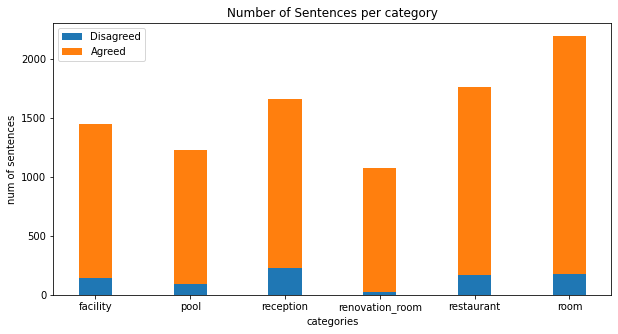

In [19]:
plot(sent_cat_dict, 'Number of Sentences per category', 'num of sentences')  # one of the category agreed.

In [20]:
cpts_df.head()

,a,b,c,Total,category,hotel_id,fileId,iId
0_0,2,0,1,3,facility,260,0,0
1_0,0,0,2,2,pool,260,1,0
2_0,2,0,1,3,renovation_room,260,2,0
3_0,2,0,1,3,restaurant,260,3,0
3_1,2,0,1,3,restaurant,260,3,1


In [21]:
lendict_cpt={}
for cat in categories:
    cat_df = cpts_df.groupby('category')
    lendict_cpt[cat]=len(cat_df)
    
cpt_cat_dict={}
for k, values in cpts_df.groupby(['category']):
    
    agreed = values[(values['a']==2)| (values['b']==2)]
    disagreed = values[values['c']==2]
    print(len(disagreed), len(agreed))

    cpt_cat_dict[k] =(len(disagreed), len(agreed))

13 69
15 48
35 72
5 50
31 84
31 112


In [22]:
cpt_cat_dict

{'facility': (13, 69),
 'pool': (15, 48),
 'reception': (35, 72),
 'renovation_room': (5, 50),
 'restaurant': (31, 84),
 'room': (31, 112)}

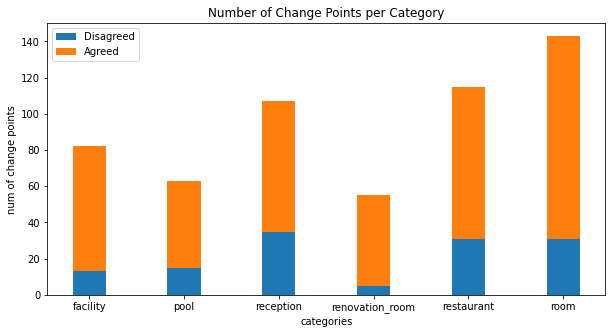

In [23]:
plot(cpt_cat_dict, "Number of Change Points per Category", "num of change points")

# Agreed sentences/ change points histograms per category


In [24]:
agreed_cpts_dict={}
for k, values in cpts_df.groupby(['category']):
    agreed_a = values[(values['a']==2)]
    agreed_b = values[values['b']==2]
    disagreed = values[values['c']==2]
    print(len(disagreed), len(agreed_a), len(agreed_b))
    agreed_cpts_dict[k] =(len(disagreed), len(agreed_a), len(agreed_b))

13 36 33
15 31 17
35 36 36
5 43 7
31 42 42
31 50 62


In [27]:
def plot2(d,title, ylabel, legend):
    agreed_a = [y for x,y,z in d.values()]
    disagreed_values = [x for x,y,z in d.values()]
    agreed_b = [z for x,y,z in d.values()]
    
    stacked_a_c = [x+y for x,y in zip(disagreed_values, agreed_a)]
    
    labels = list(d.keys())
    width =0.35
    plt.figure(figsize=(10,5))
    p1= plt.bar(labels, disagreed_values, width )
    p2 = plt.bar(labels, agreed_a, width, bottom= disagreed_values)
    p3 = plt.bar(labels, agreed_b, width, bottom = stacked_a_c)
    
    plt.ylabel(ylabel)
    plt.title(title)
#     plt.xticks(x)
    plt.xlabel('categories')
    plt.legend((p1[0], p2[0], p3[0]), legend)

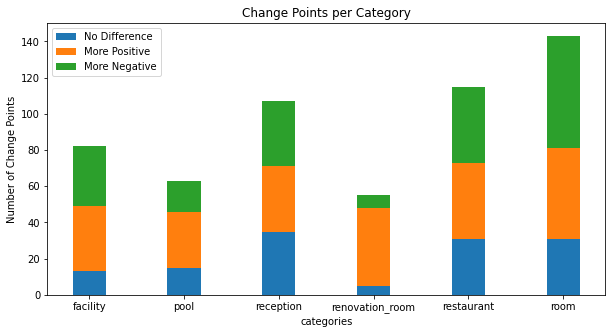

In [28]:
plot2(agreed_cpts_dict, 'Change Points per Category', 'Number of Change Points', ('No Difference', 'More Positive', 'More Negative'))

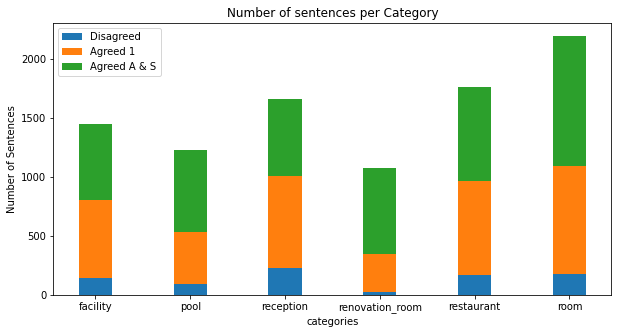

In [29]:
plot2(sent_cat_dict_two_yes, 'Number of sentences per Category', 'Number of Sentences', ('Disagreed', 'Agreed 1', 'Agreed A & S'))

# Potential Change Points

- continous three sentences, where aspect aligns, sentiment the opposite.


In [30]:
from more_itertools import consecutive_groups

In [31]:
# yes-aspect, no-sentiment
potential_cpts = {}
for fileid, values in sents_df.groupby('fileId'):
    sents = values[(values['yes-aspect']==2)& (values['no-sentiment']==2)]
    # only values['no-sentimet']==2
    
    if len(sents)>2:
        for cpt_id, cpt_values in sents.groupby('cpt'):
            if len(cpt_values)>2:
                sent_ids = cpt_values['iId'].to_list()
                
                for group in consecutive_groups(sent_ids):
                    group = list(group)
                    if len(group)>2:
                        idx = '_'.join((str(fileid), str(cpt_id)))
                        potential_cpts[idx] = group

In [32]:
potential_cpts, len(potential_cpts)

({'6_2': [27, 28, 29],
  '10_1': [14, 15, 16],
  '129_1': [17, 18, 19],
  '163_0': [0, 1, 2, 3, 4, 5, 6, 7],
  '169_0': [4, 5, 6, 7],
  '171_1': [17, 18, 19],
  '229_0': [1, 2, 3],
  '240_1': [1, 2, 3]},
 8)

# Compare room and renovation_room

In [33]:
categories

['restaurant', 'room', 'facility', 'reception', 'pool', 'renovation_room']

In [34]:
new_sent_df = sents_df[(sents_df['category']=='room') | (sents_df['category']=='renovation_room')]

In [35]:
new_sent_df.head()

,yes-sentiment,yes-aspect,no-sentiment,no-aspect,category,hotel_id,cpt,Total,fileId,iId
2_0,1,0,1,2,renovation_room,260,0,4,2,0
2_1,1,1,1,1,renovation_room,260,0,4,2,1
2_2,1,2,1,0,renovation_room,260,0,4,2,2
2_3,1,2,1,0,renovation_room,260,0,4,2,3
2_5,2,2,0,0,renovation_room,260,0,4,2,5


In [36]:
reno_room_ids = set(new_sent_df[new_sent_df['category']=='renovation_room']['hotel_id'].to_list())
room_ids = set(new_sent_df[new_sent_df['category']=='room']['hotel_id'].to_list())


In [37]:
intersect = list(reno_room_ids.intersection(room_ids))

In [38]:
len(intersect)

44

In [40]:
new_sent_df_inter = new_sent_df[new_sent_df['hotel_id'].isin(intersect)]

In [41]:
# TODO: find if their change points align
for hotelid, values in new_sent_df_inter.groupby('hotel_id'):
    print('files:',  values['fileId'][0], values['fileId'][-1])

    for k, cat_values in values.groupby('category'):
        
        print(hotelid, k, len(cat_values))

files: 92 94
16 renovation_room 20
16 room 39
files: 287 289
32 renovation_room 5
32 room 20
files: 411 413
64 renovation_room 22
64 room 30
files: 57 59
113 renovation_room 20
113 room 30
files: 381 383
122 renovation_room 19
122 room 29
files: 32 34
129 renovation_room 20
129 room 44
files: 28 29
132 renovation_room 20
132 room 20
files: 185 186
135 renovation_room 10
135 room 28
files: 42 44
136 renovation_room 20
136 room 30
files: 405 407
139 renovation_room 10
139 room 19
files: 252 253
147 renovation_room 10
147 room 18
files: 271 273
149 renovation_room 20
149 room 30
files: 87 89
174 renovation_room 30
174 room 18
files: 260 261
180 renovation_room 10
180 room 20
files: 130 132
205 renovation_room 13
205 room 17
files: 279 281
214 renovation_room 20
214 room 20
files: 375 377
221 renovation_room 20
221 room 30
files: 319 321
224 renovation_room 19
224 room 28
files: 292 293
226 renovation_room 14
226 room 30
files: 312 313
242 renovation_room 10
242 room 20
files: 47 49
243 re

# How Many Sentences in One Time Period?


In [28]:
sents_per_cpt=defaultdict(list)
for k, values in sents_df.groupby('category'):
    num_sents = values.groupby(['fileId', 'cpt']).agg({'iId':'count'})
    sents_per_cpt[k].append(num_sents)

In [29]:
sents_per_cpt

defaultdict(list,
            {'facility': [            iId
              fileId cpt     
              0      0      9
                     1      9
              5      0     10
                     1     10
              15     0     10
              ...         ...
              402    0     10
              408    0      9
                     1     10
              414    0     10
                     1     10
              
              [154 rows x 1 columns]],
             'pool': [            iId
              fileId cpt     
              1      0      9
                     1      7
              7      0     10
                     1     10
              11     0     10
              ...         ...
              410    0     10
                     1      9
              416    0     10
                     1      6
                     2     10
              
              [133 rows x 1 columns]],
             'reception': [            iId
              fileId cpt     
 